# Literature Review Figure 3

Data obtained from Dan et. al, 2021 Figure 1. Values for IgG half-life are from cross-section studies within the paper. A continous decay model was found to be the best fit for the data in Dan et. al and is used here. 

###### Data from Dan et. al
|Antibody isotype|Antigen Specificity|Half-life|95% CI|
|----------------|-------------------|---------|------|
|IgG             |S                  |150 days |89-325 days|
|IgG             |N                  |68 days  |50-106 days|

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import math

In [3]:
# y = ae^-nt

def continuous_exp_decay(n, t, peak, a): 
    # Where n = half-life, t = current day, peak = peak day, a = max
    t-=peak
    a = a
    n = 1/n  
    return a*math.exp(-n*t)

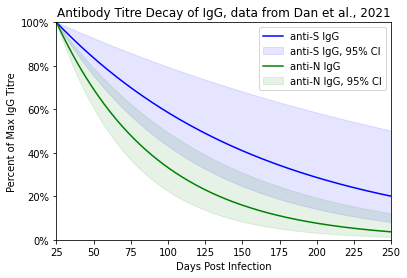

In [13]:
fig, ax = plt.subplots()

ax.set_xlim(25, 250)
ax.set_ylim(0, 100)
# ax.set_yscale('log')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())


# Labels
ax.set_title('Antibody Titre Decay of IgG, data from Dan et al., 2021')
ax.set_xlabel('Days Post Infection')
ax.set_ylabel('Percent of Max IgG Titre')

# Data from paper
peak_IgG_day = 25 
peak_S_IgG = 100
peak_N_IgG = 100
S_IgG = (89, 140, 325)
N_IgG = (50, 68, 106)

# Plotting lines
x = np.linspace(0, 350, 350)
S_lower_data = [continuous_exp_decay(S_IgG[0], t, peak_IgG_day, peak_S_IgG) for t in x]
S_mean_data = [continuous_exp_decay(S_IgG[1], t, peak_IgG_day, peak_S_IgG) for t in x]
S_mean, = ax.plot(x, S_mean_data,c='b', ls='-')
S_upper_data = [continuous_exp_decay(S_IgG[2], t, peak_IgG_day, peak_S_IgG) for t in x]
N_lower_data = [continuous_exp_decay(N_IgG[0], t, peak_IgG_day, peak_N_IgG) for t in x]
N_mean_data = [continuous_exp_decay(N_IgG[1], t, peak_IgG_day, peak_N_IgG) for t in x]
N_mean, = ax.plot(x, N_mean_data,c='g', ls='-')
N_upper_data = [continuous_exp_decay(N_IgG[2], t, peak_IgG_day, peak_N_IgG) for t in x]
S_fill = ax.fill_between(x, S_lower_data, S_upper_data, color='b', alpha=0.1)
N_fill = ax.fill_between(x, N_lower_data, N_upper_data, color='g', alpha=0.1)

# Legend and annotations
ax.legend([S_mean, S_fill, N_mean, N_fill],
          ['anti-S IgG', 'anti-S IgG, 95% CI', 'anti-N IgG', 'anti-N IgG, 95% CI'],
          bbox_to_anchor=(1, 1))


fig.savefig('AntibodyTitreDecay3.png')

## References

DAN, J. M., MATEUS, J., KATO, Y., HASTIE, K. M., YU, E. D., FALITI, C. E., GRIFONI, A., RAMIREZ, S. I., HAUPT, S., FRAZIER, A., NAKAO, C., RAYAPROLU, V., RAWLINGS, S. A., PETERS, B., KRAMMER, F., SIMON, V., SAPHIRE, E. O., SMITH, D. M., WEISKOPF, D., SETTE, A. & CROTTY, S. 2021. Immunological memory to SARS-CoV-2 assessed for up to 8 months after infection. Science, 371.
